In [120]:
## importing anything I may need
import pandas as pd
import sqlite3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
## import dataset
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

## Exploring movie_gross Dataset

In [4]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


noticed that foreign_gross is an object. I should convert that to integer/float.

In [6]:
movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Movies from 2010-2018

In [7]:
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

## Exporing movie_info

In [8]:
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')

In [9]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [10]:
movie_info.describe(include='object')

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
count,1498,1557,1552,1361,1111,1201,1201,340,340,1530,494
unique,1497,6,299,1125,1069,1025,717,1,336,142,200
top,A group of air crash survivors are stranded in...,R,Drama,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"32,000,000",90 minutes,Universal Pictures
freq,2,521,151,10,4,8,11,340,2,72,35


In [11]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [12]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

## Exploring reviews

In [13]:
reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='latin1')

In [14]:
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [15]:
reviews.describe(include='object')

,review,rating,fresh,critic,publisher,date
count,48869,40915,54432,51710,54123,54432
unique,48682,186,2,3496,1281,5963
top,Parental Content Review,3/5,fresh,Emanuel Levy,eFilmCritic.com,"January 1, 2000"
freq,24,4327,33035,595,673,4303


In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [17]:
reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

## Exploring tmbd_movies

In [18]:
tmbd_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [19]:
tmbd_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [20]:
tmbd_movies.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [21]:
tmbd_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


## Explore budgets

In [22]:
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [23]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
budgets.describe(include='object')

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,24,3,231,548,367


In [25]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [26]:
budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [27]:
conn = sqlite3.connect('./zippedData/im.db/im.db')
q = pd.read_sql("""
SELECT *
FROM sqlite_master

""", conn)
q

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [28]:
q = pd.read_sql("""

SELECT *
FROM movie_basics
LIMIT 10

""", conn)
q

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [29]:
less_90 = pd.read_sql("""

SELECT DISTINCT primary_title, runtime_minutes
FROM movie_basics
WHERE runtime_minutes < 90

""", conn)
less_90

,primary_title,runtime_minutes
0,The Wandering Soap Opera,80.0
1,A Thin Life,75.0
2,Joe Finds Grace,83.0
3,Nema aviona za Zagreb,82.0
4,Children of the Green Dragon,89.0
...,...,...
62421,A Cherry Tale,85.0
62422,Vida em Movimento,70.0
62423,Drømmeland,72.0
62424,The Rehearsal,51.0


In [30]:
more_90 = pd.read_sql("""

SELECT DISTINCT primary_title, runtime_minutes
FROM movie_basics
WHERE runtime_minutes > 90

""", conn)
more_90

,primary_title,runtime_minutes
0,Sunghursh,175.0
1,One Day Before the Rainy Season,114.0
2,The Other Side of the Wind,122.0
3,Pál Adrienn,136.0
4,So Much for Justice!,100.0
...,...,...
44508,The War of Godzilla,102.0
44509,The Last White Witch,97.0
44510,The Mystery of a Buryat Lama,94.0
44511,Kuambil Lagi Hatiku,123.0


In [31]:
more_90['primary_title'].value_counts()

Homecoming          8
Anna                6
The Trial           6
Redemption          6
One Day             5
                   ..
Next Stop           1
Fatal Attraktion    1
Petrang kabayo      1
Alifa               1
Rudane              1
Name: primary_title, Length: 42880, dtype: int64

In [32]:
more_90.loc[more_90['primary_title'] == 'Redemption']

,primary_title,runtime_minutes
1903,Redemption,97.0
7547,Redemption,100.0
17399,Redemption,115.0
17696,Redemption,110.0
18881,Redemption,106.0
42098,Redemption,104.0


In [33]:
more_90.drop_duplicates(subset='primary_title', keep=False, inplace=True)

In [34]:
less_90['primary_title'].value_counts()

Home                                      15
The Return                                10
Gone                                       9
Broken                                     7
The Wall                                   7
                                          ..
Rokovoe uvlechenie                         1
My Father the Banker                       1
Charles Bonaparte, le père de Napoléon     1
Brew House                                 1
Francofonia                                1
Name: primary_title, Length: 60338, dtype: int64

In [35]:
less_90.drop_duplicates(subset='primary_title', keep=False, inplace=True)

In [36]:
budgets['movie'].value_counts()

Halloween                    3
King Kong                    3
Home                         3
House of Wax                 2
Pet Sematary                 2
                            ..
After the Sunset             1
L.I.E.                       1
Higher Power                 1
Malevolence                  1
One Direction: This is Us    1
Name: movie, Length: 5698, dtype: int64

In [37]:
budgets.drop_duplicates(subset='movie', keep=False, inplace=True)

In [38]:
more_90_budgets = more_90.merge(budgets, how='inner', left_on='primary_title', right_on='movie')

In [39]:
more_90_budgets.head()

,primary_title,runtime_minutes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Foodfight!,91.0,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,The Secret Life of Walter Mitty,114.0,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
2,A Walk Among the Tombstones,114.0,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
3,Jurassic World,124.0,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
4,The Rum Diary,119.0,16,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732"


In [40]:
more_90_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 0 to 1497
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      1498 non-null   object 
 1   runtime_minutes    1498 non-null   float64
 2   id                 1498 non-null   int64  
 3   release_date       1498 non-null   object 
 4   movie              1498 non-null   object 
 5   production_budget  1498 non-null   object 
 6   domestic_gross     1498 non-null   object 
 7   worldwide_gross    1498 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 105.3+ KB


In [41]:
more_90_budgets.duplicated().sum()

0

In [42]:
more_90_budgets.drop_duplicates(inplace=True)

In [43]:
more_90_budgets.duplicated().sum()

0

In [44]:
less_90_budgets = less_90.merge(budgets, how='inner', left_on='primary_title', right_on='movie')

In [45]:
less_90_budgets.head()

,primary_title,runtime_minutes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Piranha 3D,88.0,52,"Aug 20, 2010",Piranha 3D,"$24,000,000","$25,003,155","$83,660,160"
1,Priest,87.0,29,"May 13, 2011",Priest,"$60,000,000","$29,136,626","$84,154,026"
2,Red State,88.0,22,"Sep 23, 2011",Red State,"$4,000,000","$1,065,429","$1,983,596"
3,Please Give,87.0,15,"Apr 30, 2010",Please Give,"$3,000,000","$4,033,574","$4,570,178"
4,The Dead Undead,89.0,7,"Dec 31, 2010",The Dead Undead,"$1,100,000",$0,$0


In [46]:
less_90_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      503 non-null    object 
 1   runtime_minutes    503 non-null    float64
 2   id                 503 non-null    int64  
 3   release_date       503 non-null    object 
 4   movie              503 non-null    object 
 5   production_budget  503 non-null    object 
 6   domestic_gross     503 non-null    object 
 7   worldwide_gross    503 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 35.4+ KB


In [47]:
less_90_budgets.duplicated().sum()

0

In [48]:
less_90_budgets.drop_duplicates(inplace=True)

In [49]:
less_90_budgets.duplicated().sum()

0

In [50]:
more_90_budgets['production_budget'] = more_90_budgets['production_budget'].str.strip('$')

In [51]:
more_90_budgets['production_budget'] = more_90_budgets['production_budget'].str.replace(',','')

In [52]:
more_90_budgets.head()

,primary_title,runtime_minutes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Foodfight!,91.0,26,"Dec 31, 2012",Foodfight!,45000000,$0,"$73,706"
1,The Secret Life of Walter Mitty,114.0,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,"$58,236,838","$187,861,183"
2,A Walk Among the Tombstones,114.0,67,"Sep 19, 2014",A Walk Among the Tombstones,28000000,"$26,017,685","$62,108,587"
3,Jurassic World,124.0,34,"Jun 12, 2015",Jurassic World,215000000,"$652,270,625","$1,648,854,864"
4,The Rum Diary,119.0,16,"Oct 28, 2011",The Rum Diary,45000000,"$13,109,815","$21,544,732"


In [53]:
more_90_budgets['worldwide_gross'] = more_90_budgets['worldwide_gross'].str.strip('$')

In [54]:
more_90_budgets['worldwide_gross'] = more_90_budgets['worldwide_gross'].str.replace(',' , '')

In [55]:
more_90_budgets['worldwide_gross'] = more_90_budgets['worldwide_gross'].astype(float)

In [56]:
more_90_budgets['production_budget'] = more_90_budgets['production_budget'].astype(float)

In [57]:
more_90_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 0 to 1497
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      1498 non-null   object 
 1   runtime_minutes    1498 non-null   float64
 2   id                 1498 non-null   int64  
 3   release_date       1498 non-null   object 
 4   movie              1498 non-null   object 
 5   production_budget  1498 non-null   float64
 6   domestic_gross     1498 non-null   object 
 7   worldwide_gross    1498 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 105.3+ KB


In [58]:
more_90_budgets['profit'] = more_90_budgets['worldwide_gross'] - more_90_budgets['production_budget']

In [59]:
more_90_budgets.head()

,primary_title,runtime_minutes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,Foodfight!,91.0,26,"Dec 31, 2012",Foodfight!,45000000.0,$0,7.370600e+04,-4.492629e+07
1,The Secret Life of Walter Mitty,114.0,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,"$58,236,838",1.878612e+08,9.686118e+07
2,A Walk Among the Tombstones,114.0,67,"Sep 19, 2014",A Walk Among the Tombstones,28000000.0,"$26,017,685",6.210859e+07,3.410859e+07
3,Jurassic World,124.0,34,"Jun 12, 2015",Jurassic World,215000000.0,"$652,270,625",1.648855e+09,1.433855e+09
4,The Rum Diary,119.0,16,"Oct 28, 2011",The Rum Diary,45000000.0,"$13,109,815",2.154473e+07,-2.345527e+07


In [60]:
less_90_budgets['production_budget'] = less_90_budgets['production_budget'].str.strip('$')

In [61]:
less_90_budgets['production_budget'] = less_90_budgets['production_budget'].str.replace(',','')

In [62]:
less_90_budgets['worldwide_gross'] = less_90_budgets['worldwide_gross'].str.strip('$')

In [63]:
less_90_budgets['worldwide_gross'] = less_90_budgets['worldwide_gross'].str.replace(',' , '')

In [64]:
less_90_budgets['worldwide_gross'] = less_90_budgets['worldwide_gross'].astype(float)

In [65]:
less_90_budgets['production_budget'] = less_90_budgets['production_budget'].astype(float)

In [66]:
less_90_budgets['profit'] = less_90_budgets['worldwide_gross'] - less_90_budgets['production_budget']

In [67]:
less_90_budgets['profit'].mean(), more_90_budgets['profit'].mean()

(33499145.77137177, 87142312.36315086)

In [68]:
less_90_budgets['profit'].std() , more_90_budgets['profit'].std()

(93495672.68551446, 194229908.67275885)

alpha level = 0.05

In [69]:
tstat, pvalue = stats.ttest_ind(less_90_budgets['profit'], more_90_budgets['profit'], equal_var=False)
tstat, pvalue

(-8.222455972551126, 3.816735173488016e-16)

In [81]:
q = pd.read_sql("""

SELECT *
FROM movie_ratings
LIMIT 10

""", conn)
q

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [78]:
more_90_budgets.sort_values('profit', ascending=False)[:10]

,primary_title,runtime_minutes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
638,Avatar,93.0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,2.351345e+09
1488,Titanic,115.0,43,"Dec 19, 1997",Titanic,200000000.0,"$659,363,944",2.208208e+09,2.008208e+09
1249,Avengers: Infinity War,149.0,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,1.748134e+09
3,Jurassic World,124.0,34,"Jun 12, 2015",Jurassic World,215000000.0,"$652,270,625",1.648855e+09,1.433855e+09
1016,Furious 7,137.0,67,"Apr 3, 2015",Furious 7,190000000.0,"$353,007,020",1.518723e+09,1.328723e+09
671,Black Panther,134.0,42,"Feb 16, 2018",Black Panther,200000000.0,"$700,059,566",1.348258e+09,1.148258e+09
1324,Jurassic World: Fallen Kingdom,128.0,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,"$417,719,760",1.305773e+09,1.135773e+09
870,Minions,91.0,73,"Jul 10, 2015",Minions,74000000.0,"$336,045,770",1.160336e+09,1.086336e+09
918,Avengers: Age of Ultron,141.0,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,1.072414e+09
1164,Incredibles 2,118.0,44,"Jun 15, 2018",Incredibles 2,200000000.0,"$608,581,744",1.242521e+09,1.042521e+09


Avatar - PG13, Titanic - PG13, Avengers: Infinity War - PG13, Jurassic World - PG13, Furious 7 - PG13, Black Panther - PG13, Jurassic World: Fallen Kingdom - PG13, Minions - PG, Avengers: Age of Ultran - PG13, Incredibles 2 - PG

8 PG13 and 2 PG in the top 10 profitable movies longer than 90 mins.

In [82]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [86]:
movie_rating_and_time = movie_info[['rating', 'runtime']]

In [88]:
movie_rating_and_time.isna().sum()

rating      3
runtime    30
dtype: int64

In [89]:
movie_rating_and_time.dropna(inplace=True)

<ipython-input-89-096dee674473>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_rating_and_time.dropna(inplace=True)


In [90]:
movie_rating_and_time.isna().sum()

rating     0
runtime    0
dtype: int64

In [108]:
movie_rating_and_time['rating'].value_counts()

R        519
PG       239
PG-13    232
G         57
Name: rating, dtype: int64

In [105]:
movie_rating_and_time = movie_rating_and_time[movie_rating_and_time['rating'] != 'NC17']

In [107]:
movie_rating_and_time = movie_rating_and_time[movie_rating_and_time['rating'] != 'NR']

In [119]:
movie_rating_and_time.to_csv('rating_v_time.csv', index=False)

In [118]:
movie_rating_and_time.head()

,rating,runtime
0,R,104 minutes
1,R,108 minutes
2,R,116 minutes
3,R,128 minutes
5,PG,95 minutes


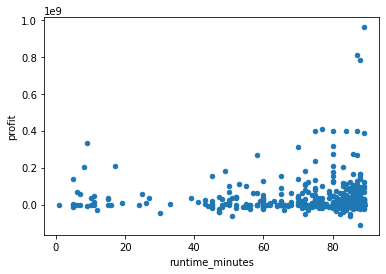

In [121]:
less_90_budgets.plot.scatter(x='runtime_minutes', y='profit');

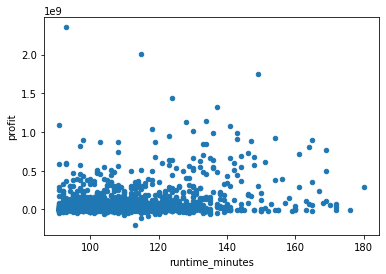

In [122]:
more_90_budgets.plot.scatter(x='runtime_minutes', y='profit');

In [123]:
all_runtime = pd.read_sql("""

SELECT DISTINCT primary_title, runtime_minutes
FROM movie_basics


""", conn)
all_runtime

,primary_title,runtime_minutes
0,Sunghursh,175.0
1,One Day Before the Rainy Season,114.0
2,The Other Side of the Wind,122.0
3,Sabse Bada Sukh,NaN
4,The Wandering Soap Opera,80.0
...,...,...
145055,Kuambil Lagi Hatiku,123.0
145056,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN
145057,Dankyavar Danka,NaN
145058,6 Gunn,116.0


In [124]:
all_runtime.drop_duplicates(subset='primary_title', keep=False, inplace=True)

In [125]:
all_runtime_budgets = all_runtime.merge(budgets, how='inner', left_on='primary_title', right_on='movie')

In [130]:
all_runtime_budgets['production_budget'] = all_runtime_budgets['production_budget'].str.strip('$')

In [131]:
all_runtime_budgets['production_budget'] = all_runtime_budgets['production_budget'].str.replace(',','')

In [132]:
all_runtime_budgets['production_budget'] = all_runtime_budgets['production_budget'].astype(float)

In [133]:
all_runtime_budgets['worldwide_gross'] = all_runtime_budgets['worldwide_gross'].str.strip('$')

In [134]:
all_runtime_budgets['worldwide_gross'] = all_runtime_budgets['worldwide_gross'].str.replace(',','')

In [135]:
all_runtime_budgets['worldwide_gross'] = all_runtime_budgets['worldwide_gross'].astype(float)

In [136]:
all_runtime_budgets['profit'] = all_runtime_budgets['worldwide_gross'] - all_runtime_budgets['production_budget']

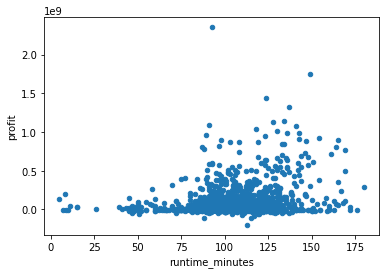

In [140]:
all_runtime_budgets.plot.scatter(x='runtime_minutes',y='profit');

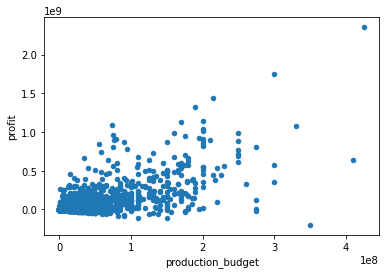

In [141]:
all_runtime_budgets.plot.scatter(x='production_budget',y='profit');

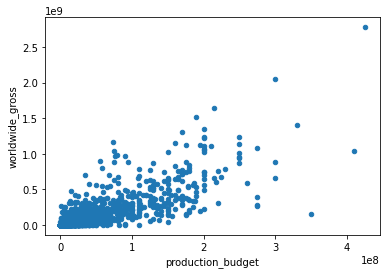

In [142]:
all_runtime_budgets.plot.scatter(x='production_budget',y='worldwide_gross');